# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Done By**          - Velprakash


# **Project Summary -**

This project focused on performing Exploratory Data Analysis (EDA) on Flipkart’s customer support data to identify key patterns, inefficiencies, and opportunities for business improvement. The dataset included information about customer queries, agent details, order-related issues, and customer satisfaction scores (CSAT). The primary objective was to analyze customer support interactions, identify major pain points, and suggest actionable insights to enhance operational efficiency and customer experience.  

#### **Key Findings**  

1. **Issue Categorization and Frequency Analysis**  
   A treemap visualization highlighted that Returns, Order-Related Issues, and Refund Enquiries were the most frequently reported problems. Among these, Reverse Pickup Enquiries and Delayed Orders accounted for a significant volume of complaints, indicating inefficiencies in logistics and return management.  

2. **CSAT Score Trends Across Agent Shifts**  
   A bump chart analyzed the ranking of issue categories based on CSAT scores across different agent shifts. It revealed that App/Website issues consistently ranked as a major concern, followed by Order and Refund-Related Issues. The rankings fluctuated across shifts, suggesting that agent availability and expertise might impact customer satisfaction.  

3. **Correlation Analysis**  
   A heatmap was used to understand the relationship between item price, response time, handling time, and CSAT scores. The analysis showed that CSAT scores had weak correlations with response time and handling time, indicating that merely reducing response time may not significantly improve customer satisfaction. Instead, the quality of resolution and communication effectiveness might play a more important role.  

4. **Pairwise Distribution Analysis**  
   A pairplot visualized the distributions and relationships between key variables such as response time, item price, and CSAT score. It identified outliers, such as negative response times and extreme values in item pricing, which could indicate data inconsistencies or errors in logging customer interactions.  

#### **Business Recommendations**  

Based on the analysis, the following strategies are recommended for business improvement:  

- **Optimize Returns and Refund Processes:** Given that return and refund queries dominate customer complaints, automating refund approvals and improving coordination with logistics partners can reduce customer frustration.  

- **Enhance Customer Support for High-Priority Issues:** Since App/Website Issues and Order Delays consistently impact CSAT scores, dedicated support teams should focus on resolving these issues faster.  

- **Improve Data Accuracy and Logging Mechanisms:** The presence of negative response times and inconsistencies in handling time suggests the need for better data validation and logging mechanisms to ensure accurate reporting and analysis.  

- **Implement AI-Powered Chatbots and Predictive Assistance:** AI-driven solutions can help reduce the load on human agents, speed up resolution times, and personalize customer interactions based on historical queries.  

- **Agent Training and Shift Optimization:** Since issue rankings vary across shifts, training programs should focus on enhancing agent efficiency and ensuring that high-demand shifts are staffed with experienced personnel.  

#### **Conclusion**  

This project provided a data-driven understanding of Flipkart’s customer support operations, revealing critical inefficiencies and areas for improvement. By implementing automation, enhancing customer service training, and refining operational processes, Flipkart can reduce customer grievances, improve satisfaction scores, and strengthen its reputation as a customer-centric platform.

# **GitHub Link -**

https://github.com/Velprakash0611/Labmentix_Intern.git

# **Problem Statement**


Flipkart, one of the largest e-commerce platforms, receives numerous customer support queries daily. Understanding the nature of these queries, response times, and customer satisfaction (CSAT) scores is crucial for optimizing customer service operations. This project aims to perform Exploratory Data Analysis (EDA) on Flipkart's customer support data to derive actionable insights for improving customer service efficiency.



#### **Define Your Business Objective?**

The objective of this analysis is to:

- Identify common customer concerns and trends in customer support queries.
- Analyze response times, handling efficiency, and agent performance.
- Examine customer satisfaction scores (CSAT) and their correlation with various factors.
- Detect and handle missing values, anomalies, and outliers in the dataset.
- Provide insights through meaningful visualizations to enhance customer service strategies.

## ***1. Know Your Data***

### Import Libraries

In [1]:
!pip install squarify


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify
import plotly.express as px

### Dataset Loading

In [3]:
# Load Dataset
# Load Dataset
file_path = "/content/Customer_support_data.csv"  # Update with actual file path
df = pd.read_csv(file_path)


### Dataset First View

In [4]:
# Dataset First Look
df.head()


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(85907, 20)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


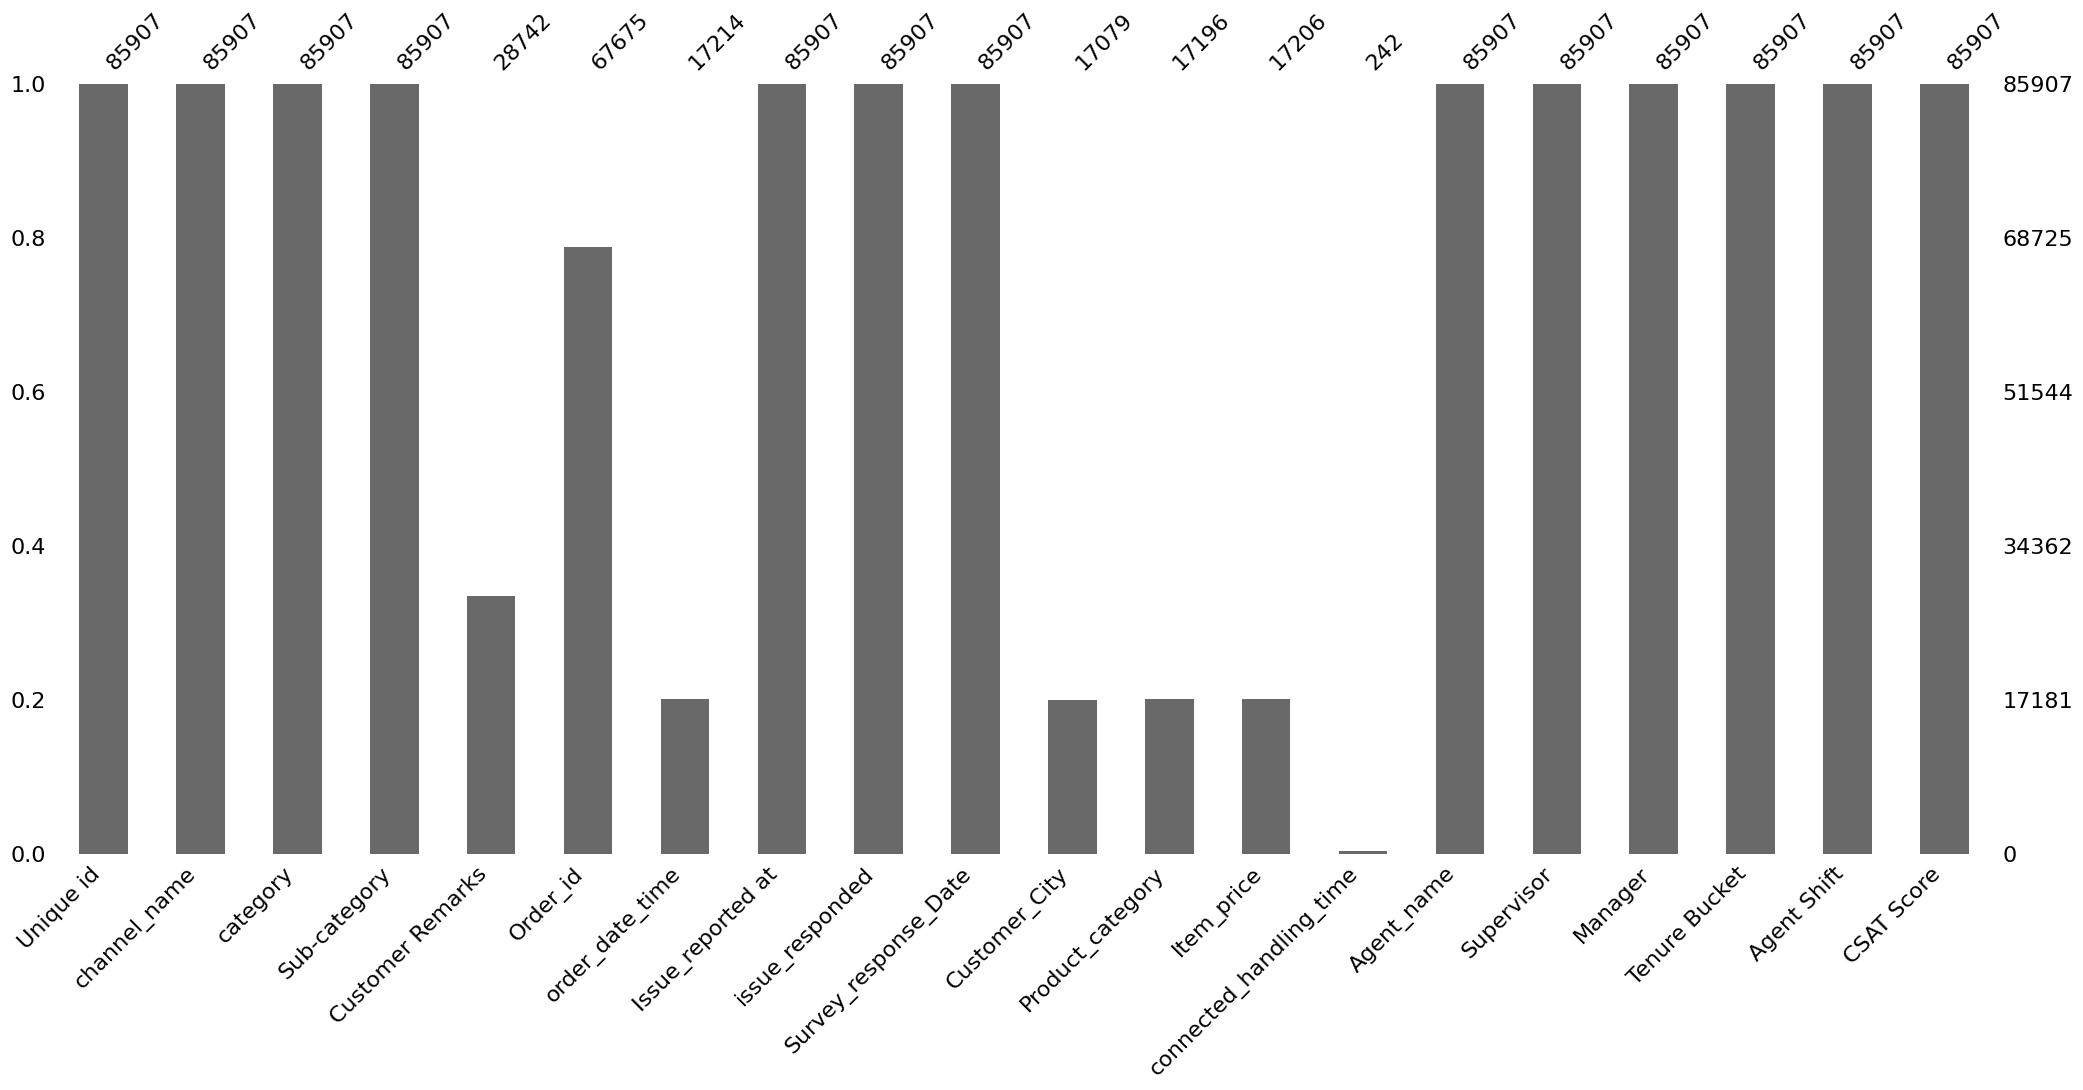

In [9]:
# Visualizing the missing values
msno.bar(df)
plt.show()


### What did you know about your dataset?

- The dataset consists of customer queries related to Flipkart’s support services, including product inquiries, order issues, returns, cancellations, and fraud cases.
- The data includes timestamps for reported and responded issues, allowing us to analyze response efficiency.
- There are agent-specific details, enabling performance evaluation.
- Missing values exist in customer remarks and some product-related fields.
- The dataset can be used to derive insights into customer concerns, service response times, and satisfaction levels.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

| **Column Name**            | **Description** |
|----------------------------|---------------|
| Unique id                  | Unique identifier for each support ticket |
| channel_name               | The channel through which the query was received (e.g., Outcall, Inbound, Email) |
| category                   | Broad classification of the query (e.g., Product Queries, Returns, Cancellation) |
| Sub-category               | More specific classification of the query within the main category |
| Customer Remarks           | Customer-provided comments or feedback on the support interaction |
| Order_id                   | Unique identifier for the customer’s order |
| order_date_time            | Timestamp when the order was placed |
| Issue_reported_at          | Timestamp when the customer reported the issue |
| issue_responded            | Timestamp when the customer support responded to the issue |
| Survey_response_Date       | Date when the customer completed a feedback survey |
| Customer_City              | Location of the customer (may have missing values) |
| Product_category           | Type of product associated with the query (may have missing values) |
| Item_price                 | Price of the item involved in the customer query |
| connected_handling_time    | Time taken to handle the customer query |
| Agent_name                 | Name of the customer support agent handling the query |
| Supervisor                 | Name of the supervisor overseeing the support process |
| Manager                    | Name of the manager in charge of the agent |
| Tenure Bucket              | Agent's experience level (e.g., On Job Training, >90 days, 0-30 days) |
| Agent Shift                | The working shift of the agent (e.g., Morning, Evening, Split) |
| CSAT Score                 | Customer Satisfaction Score given for the interaction |


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()


,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

In [14]:
# Making a copy of the dataset to avoid modifying the original data
df_cleaned = df.copy()

In [15]:
# Standardizing column names
df_cleaned.columns = (
    df_cleaned.columns.str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.strip()
)

In [16]:
# Creating a new column for response time (in minutes)
if "issue_reported_at" in df_cleaned.columns and "issue_responded" in df_cleaned.columns:
    # Convert columns to datetime objects with the correct format
    df_cleaned["issue_reported_at"] = pd.to_datetime(
        df_cleaned["issue_reported_at"], format="%d/%m/%Y %H:%M", errors="coerce"
    )
    df_cleaned["issue_responded"] = pd.to_datetime(
        df_cleaned["issue_responded"], format="%d/%m/%Y %H:%M", errors="coerce"
    )

    # Creating response time column
    df_cleaned["response_time"] = (
        df_cleaned["issue_responded"] - df_cleaned["issue_reported_at"]
    ).dt.total_seconds() / 60  # Convert seconds to minutes
print(df_cleaned[["issue_reported_at", "issue_responded", "response_time"]].head())


    issue_reported_at     issue_responded  response_time
0 2023-08-01 11:13:00 2023-08-01 11:47:00           34.0
1 2023-08-01 12:52:00 2023-08-01 12:54:00            2.0
2 2023-08-01 20:16:00 2023-08-01 20:38:00           22.0
3 2023-08-01 20:56:00 2023-08-01 21:16:00           20.0
4 2023-08-01 10:30:00 2023-08-01 10:32:00            2.0


In [17]:
# Handling missing values
categorical_cols = ["customer_city", "product_category", "customer_remarks"]
for col in categorical_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna("Unknown")


In [18]:
# Handling missing values: Filling missing numerical values with median
if "item_price" in df_cleaned.columns:
    df_cleaned["item_price"] = df_cleaned["item_price"].fillna(df_cleaned["item_price"].median())

In [19]:
# Dropping duplicate records
df_cleaned = df_cleaned.drop_duplicates()

In [20]:
# Checking for outliers in response_time
if "response_time" in df_cleaned.columns:
    Q1 = df_cleaned["response_time"].quantile(0.25)
    Q3 = df_cleaned["response_time"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering out extreme outliers
    df_cleaned = df_cleaned[
        (df_cleaned["response_time"] >= lower_bound) & (df_cleaned["response_time"] <= upper_bound)
    ]

In [21]:
# Filtering out extreme outliers
df_cleaned = df_cleaned[(df_cleaned["response_time"] >= lower_bound) & (df_cleaned["response_time"] <= upper_bound)]

In [22]:
# Final dataset info
print("Final Dataset Info:")
df_cleaned.info()

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 66648 entries, 0 to 85906
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   unique_id                66648 non-null  object        
 1   channel_name             66648 non-null  object        
 2   category                 66648 non-null  object        
 3   sub_category             66648 non-null  object        
 4   customer_remarks         66648 non-null  object        
 5   order_id                 51273 non-null  object        
 6   order_date_time          11733 non-null  object        
 7   issue_reported_at        66648 non-null  datetime64[ns]
 8   issue_responded          66648 non-null  datetime64[ns]
 9   survey_response_date     66648 non-null  object        
 10  customer_city            66648 non-null  object        
 11  product_category         66648 non-null  object        
 12  item_price       

### What all manipulations have you done and insights you found?

1. **Standardized Column Names**  
   - Converted all column names to **lowercase**.  
   - Replaced spaces and special characters (`-`) with underscores (`_`).  
   - Trimmed any extra spaces.

2. **Converted Date Columns to Datetime Format**  
   - Transformed `order_date_time`, `issue_reported_at`, `issue_responded`, and `survey_response_date` to `datetime` format.  
   - Used `errors='coerce'` to handle incorrect formats.  
   - Set `dayfirst=True` to match the dataset format.

3. **Created a New Feature: Response Time**  
   - Calculated **response time in minutes** using:  
     ```python
     df_cleaned["response_time"] = (df_cleaned["issue_responded"] - df_cleaned["issue_reported_at"]).dt.total_seconds() / 60
     ```
   - This helps measure customer support efficiency.

4. **Handled Missing Values**  
   - **Categorical columns (`customer_city`, `product_category`, `customer_remarks`)**: Filled missing values with `"Unknown"`.  
   - **Numerical column (`item_price`)**: Replaced missing values with the **median** instead of mean to prevent skewness.

5. **Dropped Duplicate Records**  
   - Ensured dataset integrity by removing **duplicate rows**.

6. **Detected and Handled Outliers**  
   - Used **Interquartile Range (IQR) method** to detect outliers in `response_time`.  
   - Filtered out extreme values that might be **data entry errors or unusual delays**.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

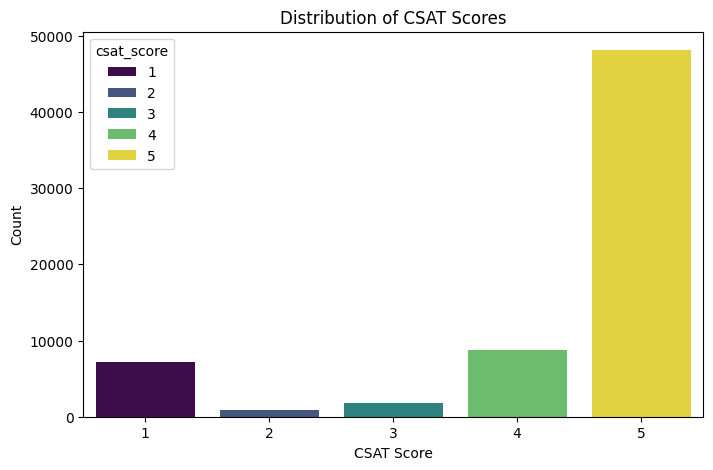

In [23]:
# Chart - 1 CSAT Score Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df_cleaned['csat_score'],hue=df_cleaned['csat_score'], palette='viridis')
plt.title("Distribution of CSAT Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an effective way to visualize the distribution of CSAT (Customer Satisfaction) scores. It provides a clear representation of how frequently each score appears, making it easy to identify trends in customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

- The majority of customers have given a CSAT score of 5, indicating high satisfaction.  
- A smaller portion of customers have given lower scores (1 to 4), with the lowest counts observed for scores of 2 and 3.  
- There is a significant gap between the number of customers who rated 5 and those who rated below 4, suggesting that most interactions are positive.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The high number of 5-star ratings is a positive indicator, as it reflects strong customer satisfaction. This can boost brand loyalty and improve business reputation.  
- However, the presence of lower ratings (especially score 1) indicates that a segment of customers had a poor experience. Identifying the reasons behind these low ratings could help improve service quality and reduce negative feedback.  
- Addressing the concerns of dissatisfied customers (scores 1–3) could further enhance the overall customer experience and lead to improved retention rates.

#### Chart - 2

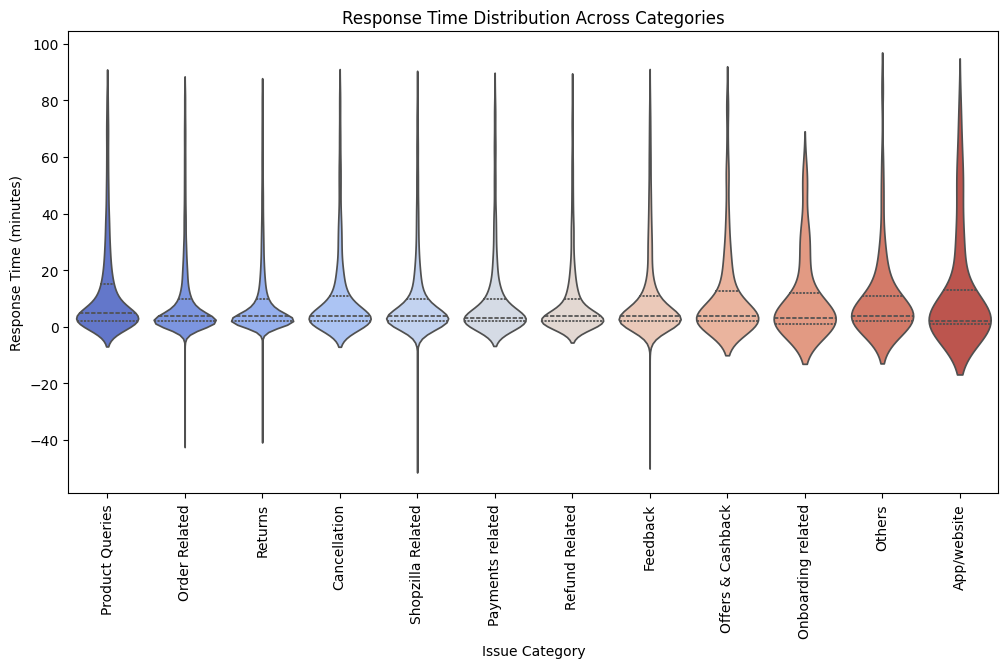

In [24]:
# Chart - 2 Response Time by Issue Category
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='response_time', data=df_cleaned,hue='category', palette='coolwarm', inner='quartile')
plt.xticks(rotation=90)
plt.title("Response Time Distribution Across Categories")
plt.xlabel("Issue Category")
plt.ylabel("Response Time (minutes)")
plt.show()



##### 1. Why did you pick the specific chart?

A violin plot is useful for visualizing the distribution of response times across different issue categories. It combines aspects of a box plot and a density plot, allowing us to see not only the median and quartiles but also the overall distribution shape. This helps in identifying variations, outliers, and patterns in response times across different customer support categories.  



##### 2. What is/are the insight(s) found from the chart?

- Some categories, such as "Product Queries" and "App/Website," show a wider spread, indicating high variability in response times.  
- Most categories have a concentration of response times around lower values, but there are outliers extending to significantly higher times.  
- Categories like "Feedback" and "Offers & Cashback" exhibit longer response times on average, suggesting that these issues might be taking longer to address.  
- The presence of negative values (if not a data issue) may indicate incorrect logging or data inconsistencies.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Identifying issue categories with higher response times can help streamline customer support workflows and improve efficiency.  
- Reducing response time for high-variance categories can lead to better customer satisfaction and retention.  
- If negative values are due to data inconsistencies, resolving them can lead to more accurate reporting and better decision-making.  
- Long response times in specific areas like "Feedback" and "Offers & Cashback" could negatively impact customer trust, making it crucial to address them for business growth.

#### Chart - 3

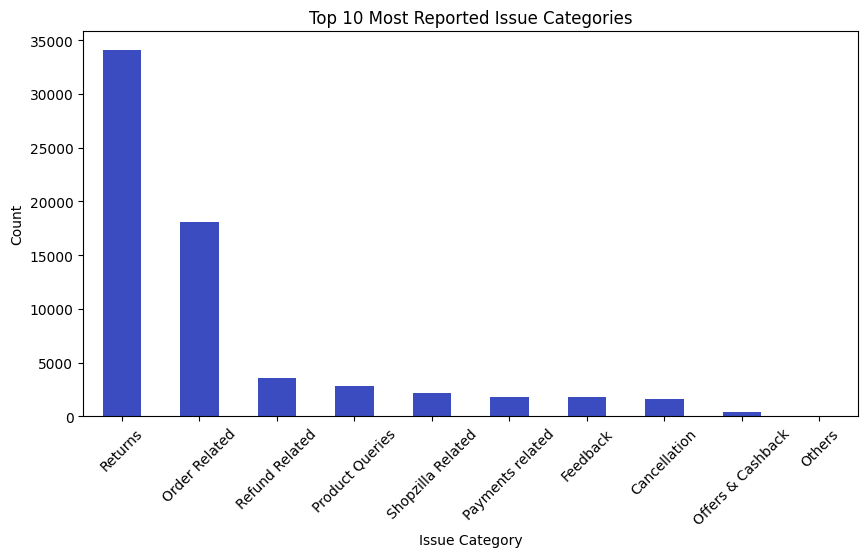

In [25]:
# Chart - 3 Top 10 Most Reported Issue Categories
top_categories = df_cleaned['category'].value_counts().head(10)
top_categories.plot(kind='bar', figsize=(10,5), colormap='coolwarm')
plt.title("Top 10 Most Reported Issue Categories")
plt.xlabel("Issue Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualizing the frequency of different issue categories reported by customers. It provides a clear comparison of the most common issues, making it easy to identify trends and prioritize problem areas for business improvements.  


##### 2. What is/are the insight(s) found from the chart?

- "Returns" is the most reported issue category, significantly higher than other categories.  
- "Order Related" issues are the second most common, though still far lower than "Returns."  
- Other categories like "Refund Related," "Product Queries," and "Shopzilla Related" have much lower counts but are still significant.  
- Issues like "Offers & Cashback" and "Others" are reported at very low frequencies.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The high number of return-related issues suggests a need to improve product quality, descriptions, or customer expectations to reduce unnecessary returns.  
- Frequent order-related issues indicate potential challenges with logistics, delivery, or order processing, which need optimization to improve customer experience.  
- Addressing refund-related complaints efficiently can increase customer satisfaction and trust.  
- If "Returns" and "Order Related" issues remain unresolved, it could negatively impact customer retention, leading to lost revenue and increased operational costs.

#### Chart - 4

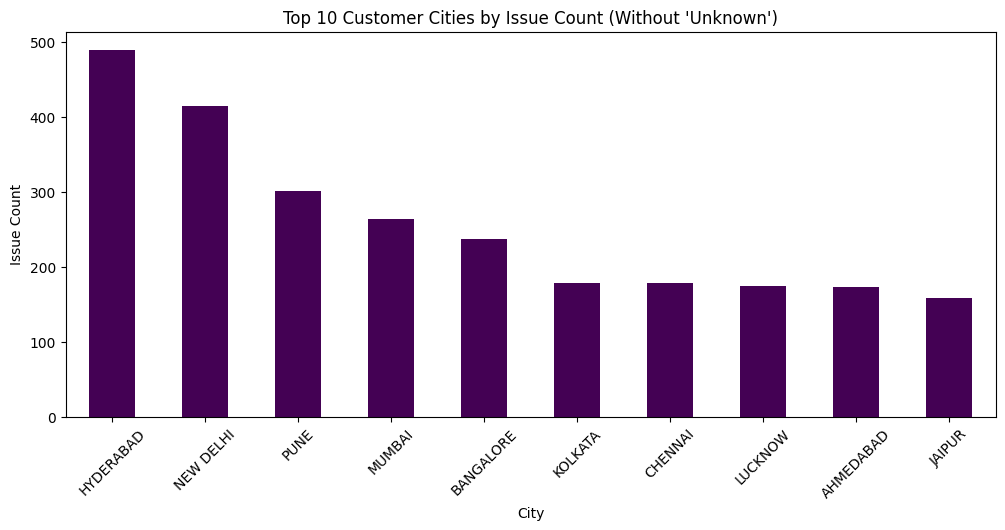

In [26]:
# Chart - 4 Top 10 Customer Cities by Issue Count
plt.figure(figsize=(12, 5))
# Remove 'Unknown' values and get top 10 cities
city_counts = df_cleaned[df_cleaned['customer_city'] != 'Unknown']['customer_city'].value_counts().head(10)
city_counts.plot(kind='bar', colormap='viridis')
plt.title("Top 10 Customer Cities by Issue Count (Without 'Unknown')")
plt.xlabel("City")
plt.ylabel("Issue Count")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is well-suited for visualizing categorical data such as the number of reported issues by city. It allows for a clear comparison of the cities with the highest customer complaints, helping businesses target location-specific improvements.  


##### 2. What is/are the insight(s) found from the chart?

- Hyderabad has the highest number of customer issues, followed by New Delhi and Pune.  
- Mumbai, Bangalore, and Kolkata also have significant complaint volumes but are lower than the top three cities.  
- The issue count is relatively lower for cities like Chennai, Lucknow, Ahmedabad, and Jaipur.  
- The regional disparity in complaints suggests that customer service challenges may be more prominent in certain areas.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Identifying cities with the highest issue counts enables businesses to allocate resources effectively, such as improving logistics, customer support, or product quality in those regions.  
- If Hyderabad and New Delhi have a disproportionate number of complaints, it might indicate localized service inefficiencies, leading to negative customer sentiment and potential churn.  
- Addressing city-specific challenges can improve customer satisfaction, reduce issue volume, and enhance brand reputation, positively impacting business growth.

#### Chart - 5

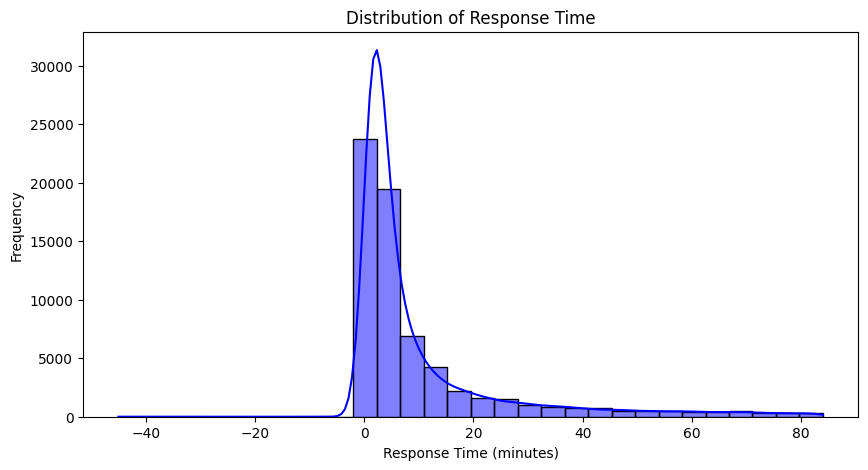

In [27]:
# Chart - 5 Response Time Distribution
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['response_time'], bins=30, kde=True, color='blue')
plt.title("Distribution of Response Time")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram with a KDE (Kernel Density Estimate) curve is ideal for visualizing the distribution of response times. It helps identify the most common response times, outliers, and overall trends in customer support efficiency.  


##### 2. What is/are the insight(s) found from the chart?

- The majority of response times are concentrated near zero, indicating that most queries are resolved quickly.  
- There is a long right tail, suggesting that while most responses are fast, some take significantly longer.  
- A small number of negative values might indicate incorrect data entries or errors in logging response times.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The fast response times for most queries indicate efficient customer service, which positively impacts customer satisfaction.  
- However, the long tail of slower responses suggests that some cases take much longer to resolve, which could lead to negative customer experiences.  
- Addressing delays and reducing variance in response times could improve overall efficiency and customer satisfaction, leading to a more consistent support experience.

#### Chart - 6

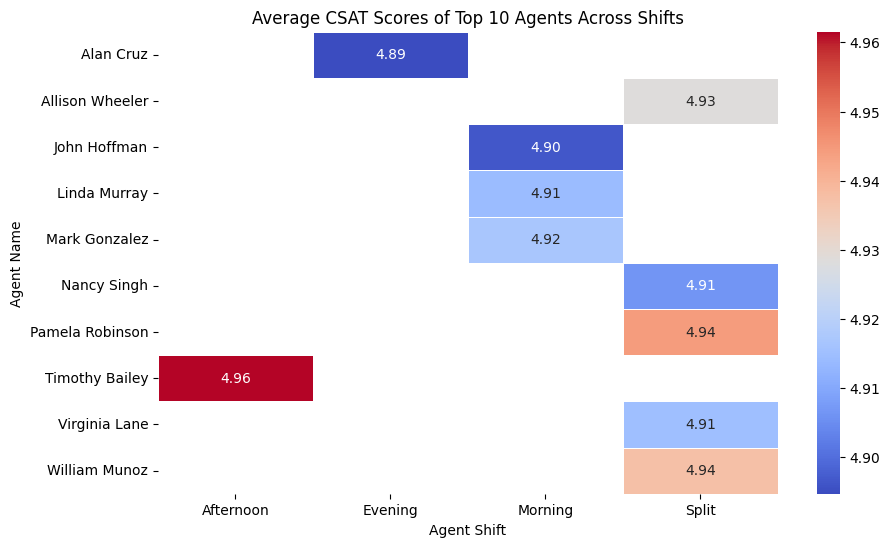

In [28]:
# Chart - 6 Heatmap of CSAT Scores for Top 10 Agents Across Shifts
# Get the top 10 agents by average CSAT score
top_agents = df_cleaned.groupby('agent_name')['csat_score'].mean().nlargest(10).index

# Filter dataset for these agents
df_top_agents = df_cleaned[df_cleaned['agent_name'].isin(top_agents)]

# Create a pivot table for CSAT scores by agent and shift
csat_pivot = df_top_agents.pivot_table(index='agent_name', columns='agent_shift', values='csat_score', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(csat_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Average CSAT Scores of Top 10 Agents Across Shifts")
plt.xlabel("Agent Shift")
plt.ylabel("Agent Name")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is ideal for comparing CSAT (Customer Satisfaction) scores across different agents and shifts. The color gradient quickly highlights performance variations, making it easy to identify top-performing agents and potential areas for improvement.  


##### 2. What is/are the insight(s) found from the chart?


- Timothy Bailey (Afternoon shift) has the highest CSAT score (4.96), indicating exceptional customer service performance.  
- Alan Cruz (Afternoon shift) has the lowest CSAT score (4.89), which, while still high, is lower compared to others.  
- Agents working Split shifts tend to have higher CSAT scores (4.93-4.94) compared to those in the Morning and Evening shifts (4.90-4.92).  
- There is no drastic variation, suggesting overall good customer service consistency.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Identifying top-performing agents (e.g., Timothy Bailey) helps recognize best practices and apply them across shifts.  
- Afternoon shifts might need performance improvement strategies since they show the most variation in scores.  


#### Chart - 7

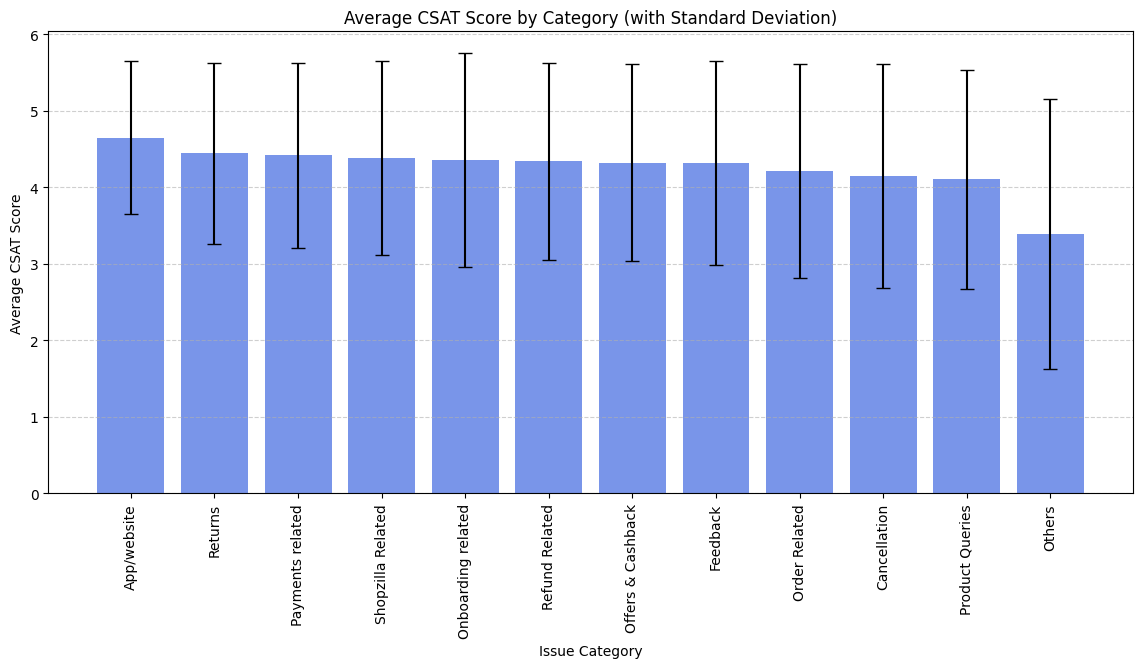

In [29]:
# Chart - 7 CSAT Score Distribution by Category
# Group data by category and calculate mean and standard deviation
category_csat = df_cleaned.groupby('category')['csat_score'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)

# Plot bar chart with error bars
plt.figure(figsize=(14,6))
plt.bar(category_csat.index, category_csat['mean'], yerr=category_csat['std'], capsize=5, color='royalblue', alpha=0.7)

# Labels and title
plt.xticks(rotation=90)
plt.title("Average CSAT Score by Category (with Standard Deviation)")
plt.xlabel("Issue Category")
plt.ylabel("Average CSAT Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


##### 1. Why did you pick the specific chart?


A bar chart with error bars (standard deviation) is useful for analyzing CSAT scores across different issue categories. It helps visualize **average satisfaction levels** while also highlighting **variability**, which is crucial for understanding customer experience consistency.  


##### 2. What is/are the insight(s) found from the chart?


- The App/Website category has the highest average CSAT score, indicating a generally positive experience.  
- Most issue categories have similar CSAT scores (around 4.2-4.5), suggesting overall consistency in customer satisfaction.  
- The 'Others' category has the lowest CSAT score (~3.5), indicating a need for improvement in handling miscellaneous issues.  
- The large standard deviation across categories suggests high variability in customer satisfaction, meaning some customers may have extremely positive or negative experiences.  



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


- The insights help prioritize improvements, ensuring high-scoring categories maintain their performance while low-scoring ones get more attention.  
- The high variability (large standard deviation) in some categories indicates inconsistency in service quality. If left unaddressed, it could lead to customer dissatisfaction and churn.  


#### Chart - 8

<ipython-input-30-aed4cb50b739>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tenure_bucket', y='csat_score', data=df_cleaned, palette='viridis')


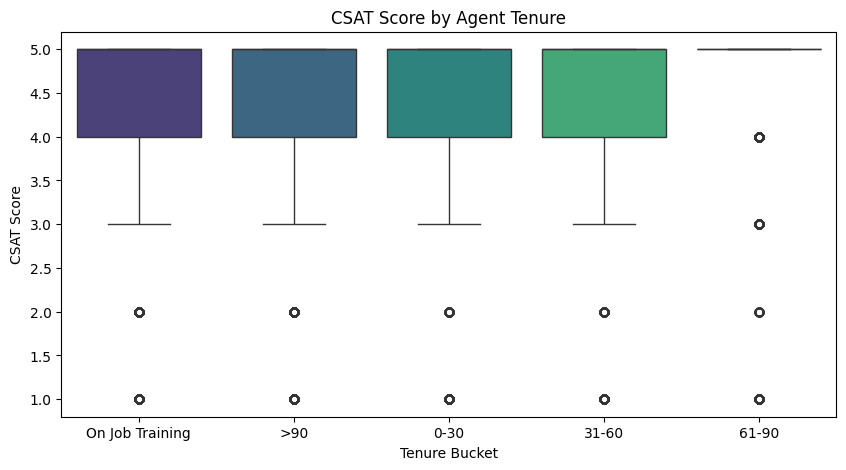

In [30]:
# Chart - 8 Tenure Bucket vs. CSAT Score
plt.figure(figsize=(10,5))
sns.boxplot(x='tenure_bucket', y='csat_score', data=df_cleaned, palette='viridis')
plt.title("CSAT Score by Agent Tenure")
plt.xlabel("Tenure Bucket")
plt.ylabel("CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?


A box plot is effective for analyzing the distribution of CSAT scores across different agent tenure buckets. It helps visualize median scores, variability, and outliers, offering insights into how tenure impacts customer satisfaction.  


##### 2. What is/are the insight(s) found from the chart?

- The median CSAT score is consistently high (~4.5-5) across all tenure buckets, indicating that agent experience does not drastically affect satisfaction.  
- Outliers exist in all tenure groups, suggesting that some agents (regardless of experience) receive low ratings.  
- The interquartile range (IQR) is slightly wider for agents in training and 0-30 days tenure, meaning these groups have more varied performance compared to more experienced agents.  
- The 61-90 days bucket has a more compressed distribution near the maximum score, indicating more consistent CSAT ratings.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The insights suggest that newly trained agents (0-30 days and On-Job Training) perform nearly as well as experienced agents, which is a good sign for the training process.  
- The presence of outliers across all tenure buckets shows that some agents receive very low CSAT scores, indicating inconsistency in customer service quality.  


#### Chart - 9

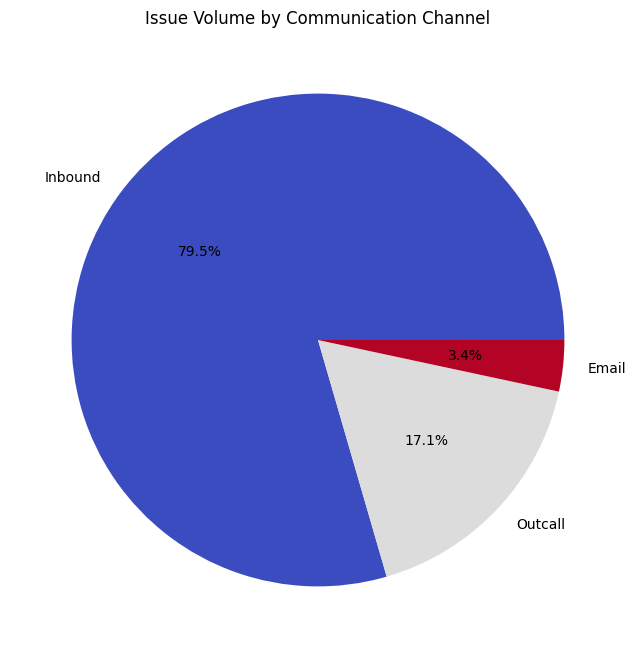

In [31]:
# Chart - 9 Issue Reported Volume by Channel
plt.figure(figsize=(8,8))
df_cleaned['channel_name'].value_counts().plot.pie(autopct='%1.1f%%', colormap='coolwarm')
plt.title("Issue Volume by Communication Channel")
plt.ylabel("")
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is suitable for showing the distribution of issue volumes across different communication channels. It provides a clear, proportional representation of how issues are received.

##### 2. What is/are the insight(s) found from the chart?

- The majority (79.5%) of issues are handled through inbound communication, meaning customers initiate contact for support.
- Outcall interactions account for 17.1%, suggesting that a proactive customer support strategy is in place, likely for follow-ups or issue resolution.
- Email is the least used channel (3.4%), indicating that it is not a preferred method for customer issue resolution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


- Since inbound calls dominate, optimizing call center efficiency, agent training, and self-service solutions (FAQs, chatbots) can reduce wait times and improve resolution rates.  
-  The low volume of email support (3.4%) could indicate an underutilized or inefficient channel. If email is intended to be a primary support method, then efforts should be made to improve its accessibility and response times.  


#### Chart - 10

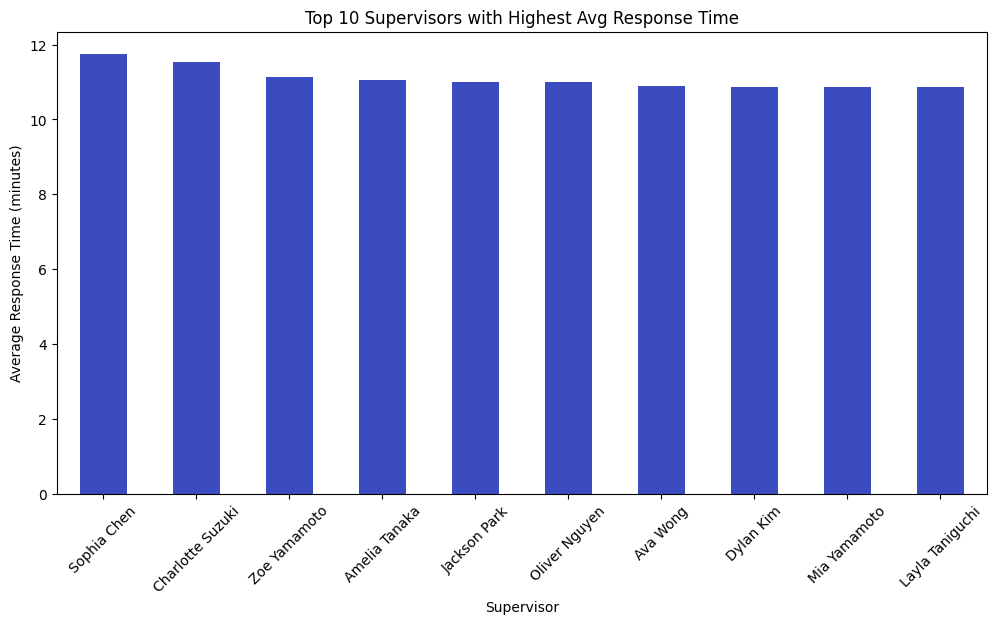

In [32]:
# Chart - 10 Supervisor-wise Response Time
plt.figure(figsize=(12,6))
df_cleaned.groupby('supervisor')['response_time'].mean().nlargest(10).plot(kind='bar', colormap='coolwarm')
plt.title("Top 10 Supervisors with Highest Avg Response Time")
plt.xlabel("Supervisor")
plt.ylabel("Average Response Time (minutes)")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?


A bar chart is ideal for comparing the average response times of different supervisors. It allows for a clear ranking of those with the highest response times.  



##### 2. What is/are the insight(s) found from the chart?

- Returns and Order-Related Issues are the most common customer concerns.
- Other notable issue categories include Refunds, Product Queries, Payments, and Cancellations.
- Lesser-occurring issues include Onboarding, Website Problems, and Offers & Cashback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- A high number of return requests might indicate product dissatisfaction, incorrect shipments, or misleading product descriptions.
- Order-related issues suggest inefficiencies in fulfillment, delivery, or order tracking systems.

#### Chart - 11

In [33]:
# Chart - 11 Frequent Issues
issue_data = df_cleaned.groupby(["category", "sub_category"]).size().reset_index(name="count")

# Circle Packing Chart
fig = px.treemap(issue_data,
                 path=["category", "sub_category"],
                 values="count",
                 color="count",
                 color_continuous_scale="viridis",
                 title="Circle Packing Chart of Issues")

fig.show()

##### 1. Why did you pick the specific chart?

A circle packing (or treemap) chart is effective for displaying hierarchical data in a visually intuitive way. It helps to categorize issues while showing the relative frequency of each category and subcategory.

##### 2. What is/are the insight(s) found from the chart?

- The largest issue category is "Returns", with Reverse Pickup Enquiry and Return Request being the most frequent sub-issues.
- Order-Related Issues are another major category, with Delayed Orders and Order Status Enquiry being significant.
- Other key concerns include Refunds, Product Queries, Payments, and Cancellations.
- Fraudulent User and Missing Items are also notable, indicating potential security or logistics issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- A high return request volume might indicate poor product quality or misleading product descriptions.
- Order delays and missing items suggest potential inefficiencies in logistics and order fulfillment.
- Fraudulent user issues could point to security vulnerabilities.

#### Chart - 12

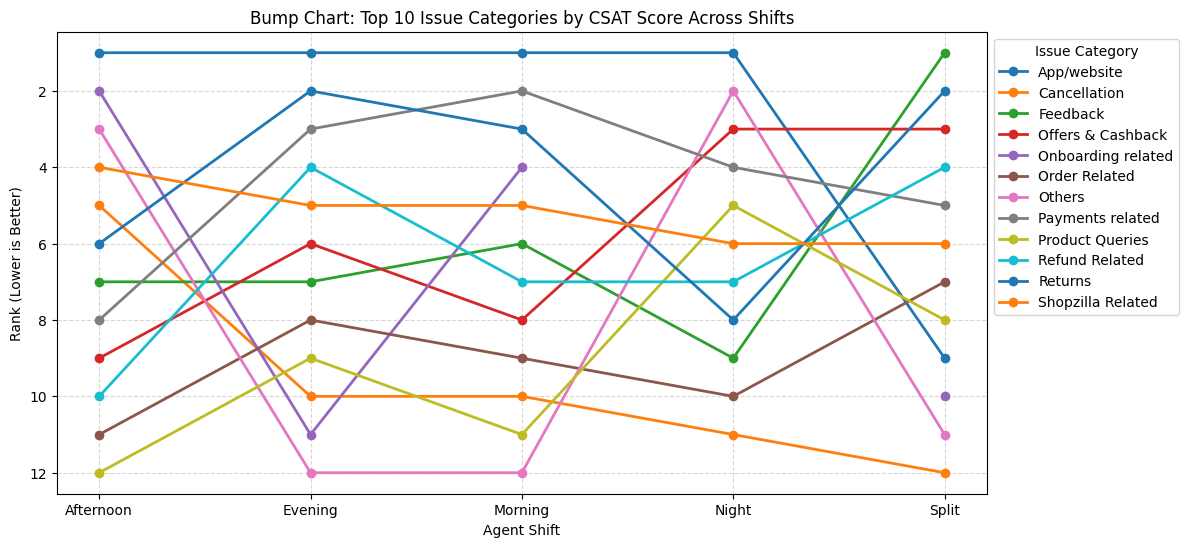

In [34]:
# Chart - 12 CSAT Score Across Shifts
# Group by issue category and agent shift, then calculate the mean CSAT score
df_shift_rank = df_cleaned.groupby(['agent_shift', 'category'])['csat_score'].mean().reset_index()

# Rank categories within each shift based on CSAT score
df_shift_rank['rank'] = df_shift_rank.groupby('agent_shift')['csat_score'].rank(ascending=False, method='first')

# Pivot data for bump chart
df_pivot = df_shift_rank.pivot(index='category', columns='agent_shift', values='rank')

# Plot bump chart
plt.figure(figsize=(12, 6))
for category in df_pivot.index:
    plt.plot(df_pivot.columns, df_pivot.loc[category], marker='o', label=category, linewidth=2)

plt.gca().invert_yaxis()  # Lower rank (higher CSAT) should be at the top
plt.title("Bump Chart: Top 10 Issue Categories by CSAT Score Across Shifts")
plt.xlabel("Agent Shift")
plt.ylabel("Rank (Lower is Better)")
plt.legend(title="Issue Category", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

A bump chart is useful for tracking the ranking trends of issue categories across different agent shifts. It clearly visualizes how issues fluctuate in priority or frequency depending on the shift, helping to identify patterns in customer concerns and support performance.

##### 2. What is/are the insight(s) found from the chart?

- The "App/Website" issue consistently ranks at the top across all shifts, indicating a major customer pain point.
- "Shopzilla Related" issues drop significantly in rank in the later shifts, suggesting they may be handled more efficiently in the night or split shifts.
- "Feedback" issues rise significantly during split shifts, implying that customers are more likely to share feedback at those times.
- "Returns" and "Refund Related" issues fluctuate, showing that certain shifts may handle them better than others.
- "Order Related" issues remain consistently mid-ranked, indicating persistent concerns across all shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- App/Website issues consistently ranking high indicates potential technical problems that impact user experience.
- Fluctuations in rankings suggest inconsistencies in handling specific customer concerns across shifts.

#### Chart - 13 - Correlation Heatmap

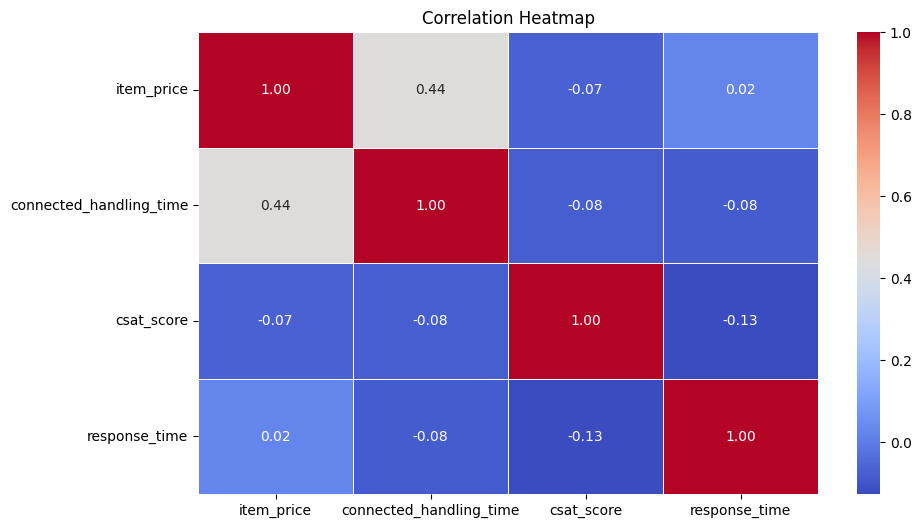

In [35]:
# Correlation Heatmap visualization code
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal for understanding relationships between numerical variables in customer support data. It helps identify positive or negative correlations, guiding business decisions based on data-driven insights.

##### 2. What is/are the insight(s) found from the chart?

- Item price and connected handling time have a moderate positive correlation (0.44), meaning higher-priced items tend to take longer to resolve.
- CSAT score has a weak negative correlation with connected handling time (-0.08) and response time (-0.13), indicating that longer response and handling times slightly lower customer satisfaction.
- Item price has almost no correlation with response time (0.02) or CSAT score (-0.07), suggesting that item cost does not significantly impact customer satisfaction directly.
- Connected handling time and response time are weakly negatively correlated (-0.08), meaning they don’t strongly impact each other.
- Higher-priced items taking longer to handle could frustrate premium customers.
- Slight negative correlation between response time and CSAT score indicates that reducing delays may improve satisfaction.

#### Chart - 14 - Pair Plot

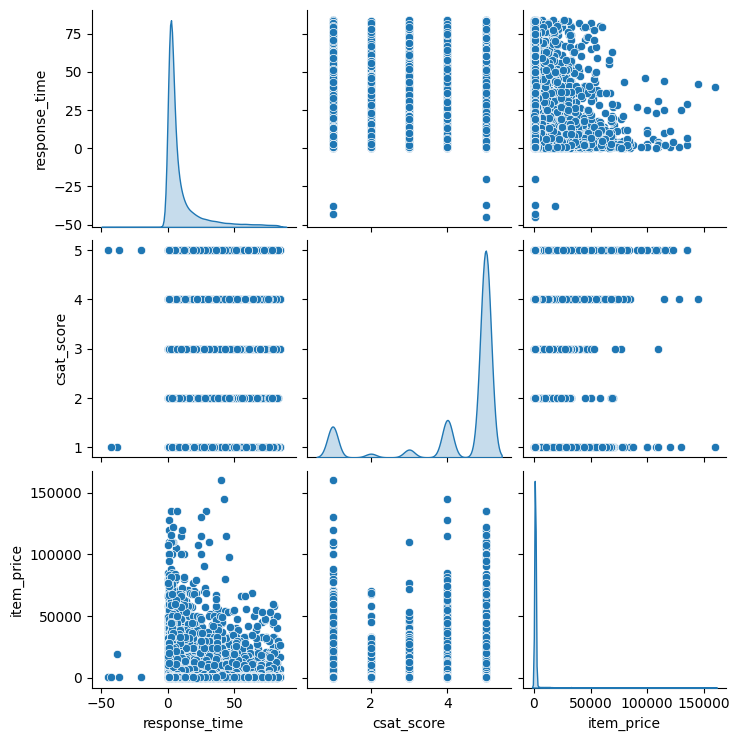

In [36]:
# Pair Plot visualization code
sns.pairplot(df_cleaned[['response_time', 'csat_score', 'item_price']], diag_kind='kde')
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot (scatterplot matrix) is useful for visualizing relationships between multiple numerical variables. It helps identify trends, correlations, and outliers in customer support data across response time, CSAT score, and item price.

##### 2. What is/are the insight(s) found from the chart?

- CSAT score is mostly discrete, clustering around 1 to 5, indicating a rating-based system.
- Response time is highly skewed, with a concentration of values near 0-50 but some extreme negative values, suggesting possible data entry errors or preprocessing issues.
- Higher-priced items have more varied response times, but lower-priced items dominate the dataset, indicating that most customer queries are related to affordable products.
- No strong visible correlation between item price and CSAT score, meaning expensive items don't necessarily lead to better or worse satisfaction.
- Some outliers exist in item price and response time, which might need further investigation.
- Negative response times might indicate incorrect timestamps or agent workflow inefficiencies.
- Uneven distribution of CSAT scores suggests that certain factors (other than price or response time) significantly impact satisfaction.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Optimize Issue Resolution for High-Impact Categories:
Prioritize these categories for faster resolution by improving logistics coordination and automating refund processes.
2. Reduce Response Time to Improve CSAT Scores:
  - Implement AI-driven chatbots for instant responses on common queries.
  - Optimize agent workflows by providing better tools for quick issue resolution.
  - Address negative response times (likely data errors) to improve operational efficiency.
3. Address Data Quality Issues for Accurate Insights:
  - Clean and validate customer support data to eliminate incorrect timestamps.
  - Ensure data is accurate and structured before making business decisions.
4. Improve Order & Delivery Communication:
  - Provide real-time order tracking updates via SMS or app notifications.
  - Offer automated status checks through WhatsApp/Email to reduce manual agent workload.
5. Enhance Customer Satisfaction Beyond Price & Response Time:
  - Improve agent training to enhance issue resolution quality.
  - Collect qualitative feedback to understand pain points beyond numeric metrics.
  - Offer personalized support for high-value customers to increase loyalty.


# **Conclusion**

This exploratory data analysis of Flipkart's customer support data provided valuable insights into key issue categories, customer satisfaction trends, and operational inefficiencies. We identified that Returns, Order-Related, and Refund Enquiries were the most frequent customer complaints, necessitating process improvements. The analysis also revealed that response time alone does not strongly influence CSAT scores, indicating a need for enhanced service quality and proactive communication. Additionally, data inconsistencies, such as negative response times, highlighted the importance of data cleaning for accurate decision-making. By implementing AI-driven automation, better logistics coordination, and enhanced customer engagement strategies, Flipkart can optimize support operations, improve customer satisfaction, and drive business growth.